# **1) Setup And Load Data**

## 1.1 Install Dependancies and Setup

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#for charts

In [ ]:
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
import tensorflow as tf
import os
import zipfile

In [ ]:
#Avoid OutOfMemory errors by setting te GPU memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: # limit VRAM memory usage
  tf.config.experimental.set_memory_growth(gpu, True)

## 1.2 Remove Dodgy Images

In [ ]:
#Images that are misslabeled , corrupted , wrong extension don't open in python
#we need to get rid of them
import cv2 #for computer vision
import imghdr #for image header

<ipython-input-6-a426dcb33601>:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr #for image header


In [ ]:
from google.colab import files #uploads the file you want
uploaded = files.upload()   #!!! inside the zip must be the files with the data, not a file that inside contains data
#first delete images lower that 10KB size

Saving data.zip to data.zip


In [ ]:
# Create a directory in colab to extract to
os.makedirs('data', exist_ok=True)

# Unzip the uploaded file
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [ ]:
data_dir = 'data' #data directory

In [ ]:
#import shutil #delete the file if you made a mistake
#shutil.rmtree('data')

In [ ]:
os.listdir(data_dir)

['sad people Google', 'happy people Google']

In [ ]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png'] #list of image extension we want

In [ ]:
img = cv2.imread(os.path.join('data', 'happy people Google', 'smile-woman_.jpg')) #shows array of image as numpy array

In [ ]:
img.shape #height-width-channels

(3844, 5125, 3)

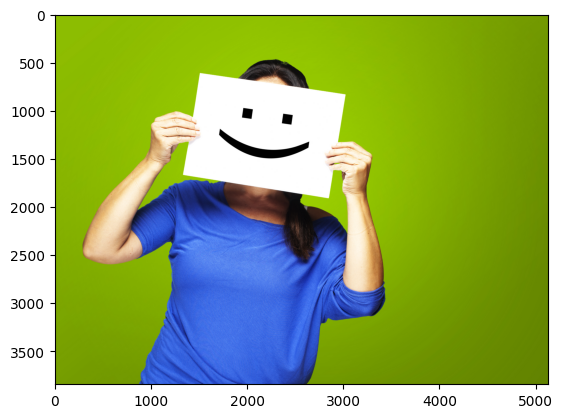

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) #CV opens it with different channels so we change that
# plt.show()  removes the text on top of the image

In [ ]:
for image_class in os.listdir(data_dir):  #loop threw folders in data_dir
  for image in os.listdir(os.path.join(data_dir, image_class)): #loop threw images in folder (data of image, class of image)
    image_path = os.path.join(data_dir, image_class, image)  #grab explicitly every single image
    try:
      img = cv2.imread(image_path)  #to check if we can load image in open CV
      tip = imghdr.what(image_path)  # check if image matches one of 4 typesin imaeg_exts
      if tip not in image_exts:
        print('Image not in ext list{}'.format(image_path))
        os.remove(image_path) # remove image from folder if image does not meet conditions
    except Exception as e:
      print('Issue with image {}'.format(image_path))

 #removes images with types not included in list #data doesn't changes in folder of pc
 #with images being removed it might make an imbalance in data

Image not in ext listdata/sad people Google/depositphotos_161575148-stock-photo-african-american-man-loo.jpg
Image not in ext listdata/sad people Google/getty_91745128_333755.webp
Image not in ext listdata/sad people Google/depositphotos_86851530-stock-photo-close-up-of-african-young.jpg
Image not in ext listdata/sad people Google/mspin_googcolor_medium.svg
Image not in ext listdata/happy people Google/eyJidWNrZXQiOiJvbS1wdWItc3RvcmFnZSIsImtleSI6ImFjdGl2ZWJlYXQv.webp
Image not in ext listdata/happy people Google/Dollarphotoclub_76084977-1.jpg
Image not in ext listdata/happy people Google/getty_152414899_97046097045006_68075.webp
Image not in ext listdata/happy people Google/Happy People.jpg
Image not in ext listdata/happy people Google/67891c01e6414a49171f7cdd_670dc58a1a956551043bb21f_traitshapp.webp
Image not in ext listdata/happy people Google/getty_478389113_970647970450091_99776.webp
Image not in ext listdata/happy people Google/istock-508455188-033183f45ba393ed4745b2dd1213c390.jpg

## 1.3 Load Data

In [ ]:
tf.data.Dataset
#API is for calling the dataset in the code , pipeline

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')
# to access the dataset we loaded from tensorflow
#builds image dataset for you (labels,classes,batch,img size) and does preprocessing

Found 183 files belonging to 2 classes.


In [ ]:
tf.keras.utils.image_dataset_from_directory
#tf.keras.utils.image_dataset_from_directory('data', batch_size=16, image_size=(128,128))

<function keras.src.utils.image_dataset_utils.image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, pad_to_aspect_ratio=False, data_format=None, verbose=True)>

In [ ]:
data_iterator = data.as_numpy_iterator() #because we generated that data and it is not preloaded
#access generator from data pipeline --> get consecutive batches using .next

In [ ]:
batch = data_iterator.next() #batch of 32 items (image array ,class) FROM ITERATOR!!!

In [ ]:
batch[0] #batch contains images and labels, gives the images

array([[[[255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         ...,
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]],

        [[255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         ...,
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]],

        [[255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         ...,
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]],

        ...,

        [[255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]

In [ ]:
batch[0].shape # from the API we used , images*height*width*channels

(32, 256, 256, 3)

In [ ]:
batch[1] #gives the labels

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int32)

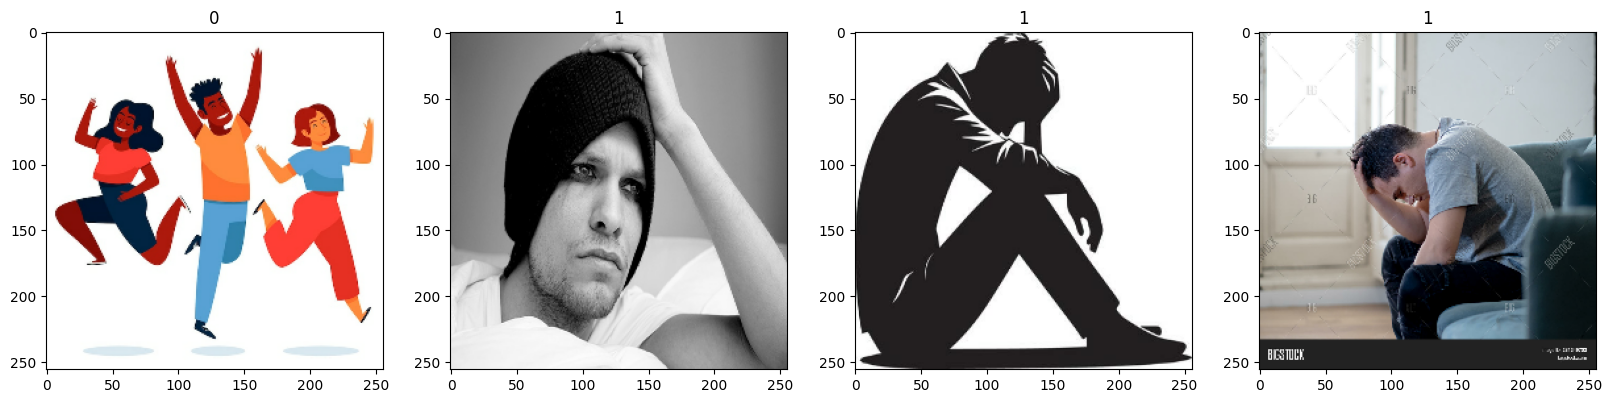

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) #know which class is what number(visualised)
for idx, img in enumerate(batch[0][:4]):         #if you want to see another batch run the .next line
  ax[idx].imshow(img.astype(int))                #1 = sad people
  ax[idx].title.set_text(batch[1][idx])

# **2) Preprocess Data**

## 2.1 Scale Data

In [ ]:
#from (0,255) to (0,1)--> faster and better results
data = data.map(lambda x,y: (x/255,y))
#apply transformation as data preproccesed threw the pipeline

In [ ]:
data.as_numpy_iterator().next() #access data inside the pipeline

(array([[[[0.35      , 0.3617647 , 0.2872549 ],
          [0.23627451, 0.24411765, 0.18921569],
          [0.2127451 , 0.20490196, 0.15392157],
          ...,
          [0.01960784, 0.06666667, 0.05098039],
          [0.02352941, 0.07058824, 0.05490196],
          [0.01960784, 0.06666667, 0.05098039]],
 
         [[0.3735294 , 0.3852941 , 0.3107843 ],
          [0.24803922, 0.25588235, 0.2009804 ],
          [0.2254902 , 0.22941177, 0.17450981],
          ...,
          [0.02352941, 0.07058824, 0.05490196],
          [0.02352941, 0.07058824, 0.05490196],
          [0.01960784, 0.06666667, 0.05098039]],
 
         [[0.38039216, 0.39215687, 0.31764707],
          [0.27745098, 0.28529412, 0.23039216],
          [0.27745098, 0.28529412, 0.23039216],
          ...,
          [0.02352941, 0.07058824, 0.05490196],
          [0.02352941, 0.07058824, 0.05490196],
          [0.01960784, 0.06666667, 0.05098039]],
 
         ...,
 
         [[0.07254902, 0.10784314, 0.09607843],
          [0.08137

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
float(batch[0].min())

0.0

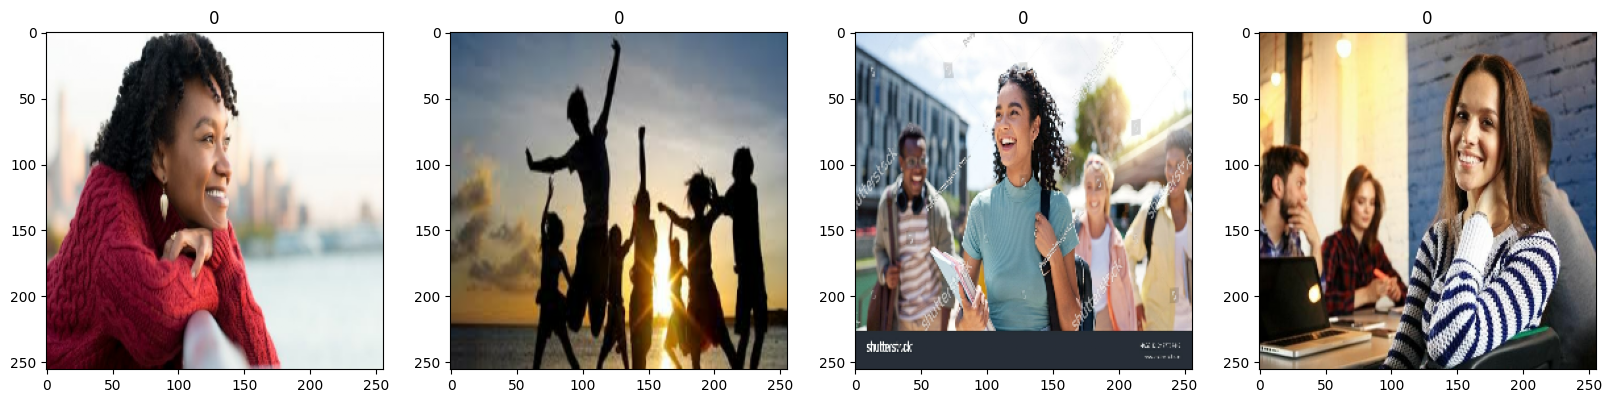

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)                   # without astype(int) because it makes the value of pixel go to 0
  ax[idx].title.set_text(batch[1][idx])

## 2.2 Split Data

In [ ]:
len(data) #size of batches x 32 Images

6

In [ ]:
train_size = int(len(data)*.7) # 70% of data
val_size = int(len(data)*.2)   # 20% of data
test_size = int(len(data)*.1) + 1 # 10% of data

In [ ]:
test_size #check if test_size batches are 0
# then add +1 to val and test !!! MUST ADD UP TO len(data)

1

In [ ]:
train_size + val_size + test_size

6

In [ ]:
train = data.take(train_size)   #take defines how much data we take
val = data.skip(train_size).take(val_size)  #skip batches we have allocated to train
test = data.skip(train_size+val_size).take(test_size)

# **3) Deep Model**

## 3.1 Build Deep Learming Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
model = Sequential() # class for Neural Network

In [ ]:
model.add(Conv2D(16, (3,3), 1 , activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D()) #16 filters/ outputs

model.add(Conv2D(32, (3,3), 1 , activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1 , activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
#Fully Connected
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  #0 for happy 1 for sad

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## 3.2 Train Model

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
#takes train data
#loss go down and accuracy go up (steadily)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.5979 - loss: 1.8531 - val_accuracy: 0.3750 - val_loss: 1.0260
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4906 - loss: 0.8460 - val_accuracy: 0.4688 - val_loss: 0.8340
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.6177 - loss: 0.5656 - val_accuracy: 0.7500 - val_loss: 0.5918
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.6687 - loss: 0.5854 - val_accuracy: 0.8125 - val_loss: 0.4116
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7531 - loss: 0.4662 - val_accuracy: 0.8750 - val_loss: 0.4803
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.8219 - loss: 0.4757 - val_accuracy: 0.7188 - val_loss: 0.3366
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.8354 - loss: 0.4011 - val_accuracy: 0.8438 - val_loss: 0.4995
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8990 - loss: 0.3984 - val_accuracy: 0.8438 - val_loss: 0.3310
Epoch 9/

## 3.3 Plot Performance

In [ ]:
history.history

{'accuracy': [0.578125,
  0.5390625,
  0.609375,
  0.6796875,
  0.7421875,
  0.8046875,
  0.8515625,
  0.8984375,
  0.90625,
  0.8984375,
  0.8828125,
  0.9375,
  0.953125,
  0.90625,
  0.9140625,
  0.953125,
  0.9609375,
  0.96875,
  0.9765625,
  0.9453125],
 'loss': [1.9780834913253784,
  0.8412272334098816,
  0.5916601419448853,
  0.5682744383811951,
  0.4899939000606537,
  0.4892815351486206,
  0.43409356474876404,
  0.3817214369773865,
  0.2979201674461365,
  0.2663082480430603,
  0.295441597700119,
  0.20546472072601318,
  0.20357026159763336,
  0.2581128776073456,
  0.20390915870666504,
  0.19507424533367157,
  0.16193392872810364,
  0.10438568890094757,
  0.08064287155866623,
  0.1167028546333313],
 'val_accuracy': [0.375,
  0.46875,
  0.75,
  0.8125,
  0.875,
  0.71875,
  0.84375,
  0.84375,
  0.90625,
  0.8125,
  0.9375,
  0.90625,
  0.9375,
  0.90625,
  0.9375,
  1.0,
  0.96875,
  0.9375,
  0.9375,
  0.96875],
 'val_loss': [1.0259747505187988,
  0.8340065479278564,
  0.59177

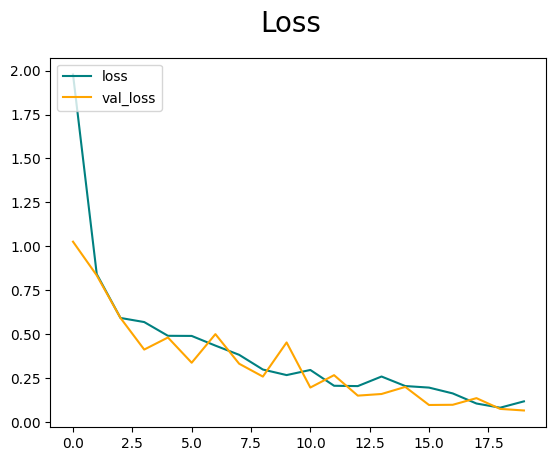

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

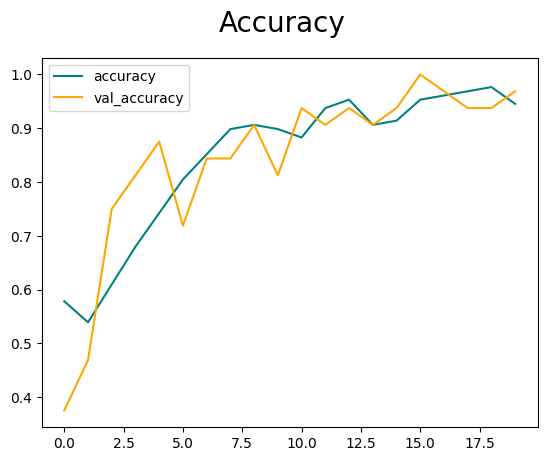

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)     #spikes because small size of validation set
plt.legend(loc="upper left")              #change batch size /add regularization
plt.show()                                # or temporal LR changes

# **4) Evaluate Performance**

## 4.1 Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch        #image , actual value
  yhat = model.predict(X)     # prediction value
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


In [ ]:
print(f'Precision {pre.result().numpy()}, Recall {re.result().numpy()}, Accuracy {acc.result().numpy()}')

Precision 1.0, Recall 0.8571428656578064, Accuracy 0.95652174949646


## 4.2 Test

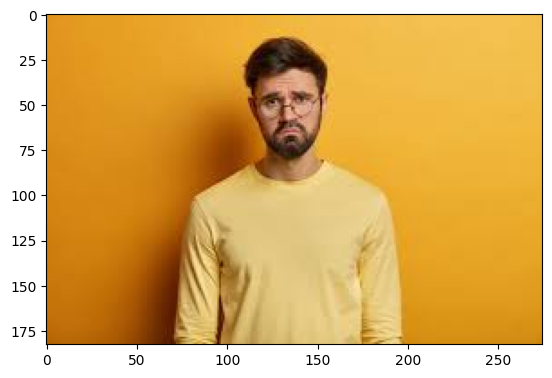

In [ ]:
img = cv2.imread('saddude.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

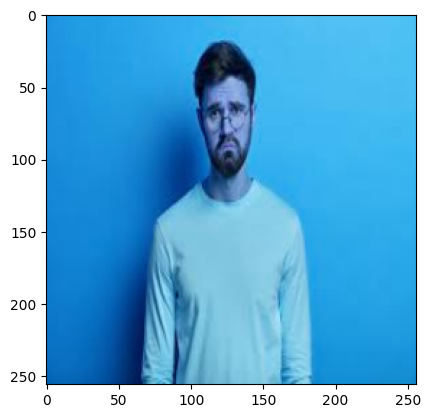

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0)) #model expects batch of images
# wraps it in another set of arrays , /255 for scale

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [ ]:
yhat

array([[0.7672457]], dtype=float32)

In [ ]:
if yhat > 0.5:
  print(f'Predicted Class is Sad')
  print(f'Probability is {yhat}')
else:
  print(f'Predicted Class is Happy')
  print(f'Probability is {1-yhat}')


Predicted Class is Sad
Probability is [[0.7672457]]


# **5) Save Model**

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','HappySad_model.h5'))

In [ ]:
new_model = load_model(os.path.join('models','HappySad_model.h5'))

In [ ]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


In [ ]:
if yhat > 0.5:
  print(f'Predicted Class is Sad')
  print(f'Probability is {yhat}')
else:
  print(f'Predicted Class is Happy')
  print(f'Probability is {1-yhat}')

Predicted Class is Sad
Probability is [[0.7672457]]


---There is a small bug in the code. The data object is always shuffling the data so there is no difference between training and validation data. To fix this bug it is necessary to change these lines:
1. Edit the line data = tf.keras.utils.image_dataset_from_directory('data'). It should be: data = tf.keras.utils.image_dataset_from_directory('data', shuffle=False,)
2. After this line add the following:
data = data.shuffle(1000, seed=100, reshuffle_each_iteration=False)

Without this correction the val_accuracy will always be 1 as there is the same data. (The problem arises when calling the take method because the data is reshuffled.)